# Import and settings

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["pdf.fonttype"] = 42
rcParams["ps.fonttype"] = 42

import anndata
import scanpy as sc

import scanpy_scripts as ss
import sctk as sk

np.set_printoptions(linewidth=180)
expr_cmap = sk.expression_colormap()
sk.set_figsize((4, 4))
sc.settings.verbosity = 0

# Load data

In [2]:
metadata = pd.read_csv("../20210611_final_object/fetal_skin.norm.maternal_removed.20220202.obs.csv.gz", index_col=0)

In [3]:
sample_metadata = metadata[['sanger_id', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample']].drop_duplicates().reset_index(drop=True).set_index("sanger_id")

In [4]:
cc_genes = sk.read_list("../data/misc/JP_cycle_genes.list")

# Endothelium

In [4]:
et_pooled = sc.read('../20200427_organoid_integration/pooled_endothelium.processed.h5ad')

In [6]:
et_pooled.var['cc'] = et_pooled.var_names.isin(cc_genes)
et_pooled.var['mito'] = et_pooled.var_names.str.startswith('MT-')
et_pooled.var['ribo'] = et_pooled.var_names.str.startswith('RPS') | et_pooled.var_names.str.startswith('RPL')

In [7]:
et_pooled.obs = et_pooled.obs.merge(sample_metadata, how="left", left_on="batch", right_index=True)

In [8]:
et_pooled

AnnData object with n_obs × n_vars = 2303 × 15445 
    obs: 'batch', 'chemistry_sorting', 'dataset', 'day', 'donor_x', 'gender_x', 'n_counts', 'n_genes', 'nh3_annot1', 'percent_hb', 'percent_mito', 'percent_ribo', 'percent_top50', 'rachel_annot3', 'sample_id', 'strain', 'week', 'annot', 'leiden_hm_r0_1', 'leiden_hm_r0_3', 'leiden_hm_r0_5', 'leiden_hm_r0_7', 'leiden_hm_r0_9', 'chemistry', 'donor_y', 'gender_y', 'pcw', 'sorting', 'sample'
    var: 'gene_ids-fetal_skin', 'cc-fetal_skin', 'mito-fetal_skin', 'ribo-fetal_skin', 'hb-fetal_skin', 'n_cells-fetal_skin', 'highly_variable-fetal_skin', 'means-fetal_skin', 'dispersions-fetal_skin', 'dispersions_norm-fetal_skin', 'highly_variable_nbatches-fetal_skin', 'highly_variable_intersection-fetal_skin', 'hvg_full-fetal_skin', 'gene_ids-organoid', 'gene_symbols-organoid', 'highly_variable-organoid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'cc', 'mito', 'ribo'
    uns: 'batch_colors', 'dataset_colors', 'leiden', 'neighbors

In [9]:
et_pooled1 = ss.lib.simple_default_pipeline(
    et_pooled, batch=['batch'], post_norm_only=True,
    hvg_kw={'by_batch': ('batch', 1), 'n_hvg': 3000},
    pca_kw={'remove_genes': ['mito', 'ribo', 'cc']},
    nb_kw={'n_pcs': 20, 'n_neighbors': 15},
)

In [10]:
et_pooled1

AnnData object with n_obs × n_vars = 2303 × 14908 
    obs: 'batch', 'chemistry_sorting', 'dataset', 'day', 'donor_x', 'gender_x', 'n_counts', 'n_genes', 'nh3_annot1', 'percent_hb', 'percent_mito', 'percent_ribo', 'percent_top50', 'rachel_annot3', 'sample_id', 'strain', 'week', 'annot', 'leiden_hm_r0_1', 'leiden_hm_r0_3', 'leiden_hm_r0_5', 'leiden_hm_r0_7', 'leiden_hm_r0_9', 'chemistry', 'donor_y', 'gender_y', 'pcw', 'sorting', 'sample'
    var: 'gene_ids-fetal_skin', 'cc-fetal_skin', 'mito-fetal_skin', 'ribo-fetal_skin', 'hb-fetal_skin', 'n_cells-fetal_skin', 'highly_variable-fetal_skin', 'means-fetal_skin', 'dispersions-fetal_skin', 'dispersions_norm-fetal_skin', 'highly_variable_nbatches-fetal_skin', 'highly_variable_intersection-fetal_skin', 'hvg_full-fetal_skin', 'gene_ids-organoid', 'gene_symbols-organoid', 'highly_variable-organoid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'cc', 'mito', 'ribo', 'n_counts', 'n_cells', 'highly_variable_nbatches', 'hvg_full'


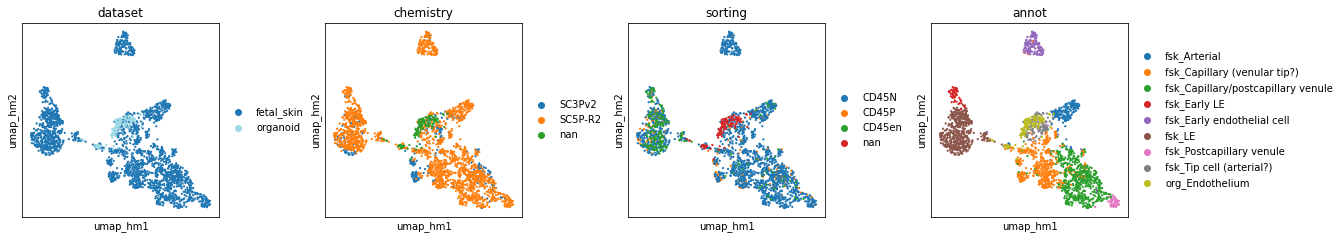

In [17]:
ss.lib.set_figsize((3.5, 3.5))
ss.lib.plot_scatter(et_pooled1, basis='umap_hm', ncols=4, size=20, color_map=expr_cmap, color=['dataset', 'chemistry', 'sorting', 'annot'], wspace=0.4)

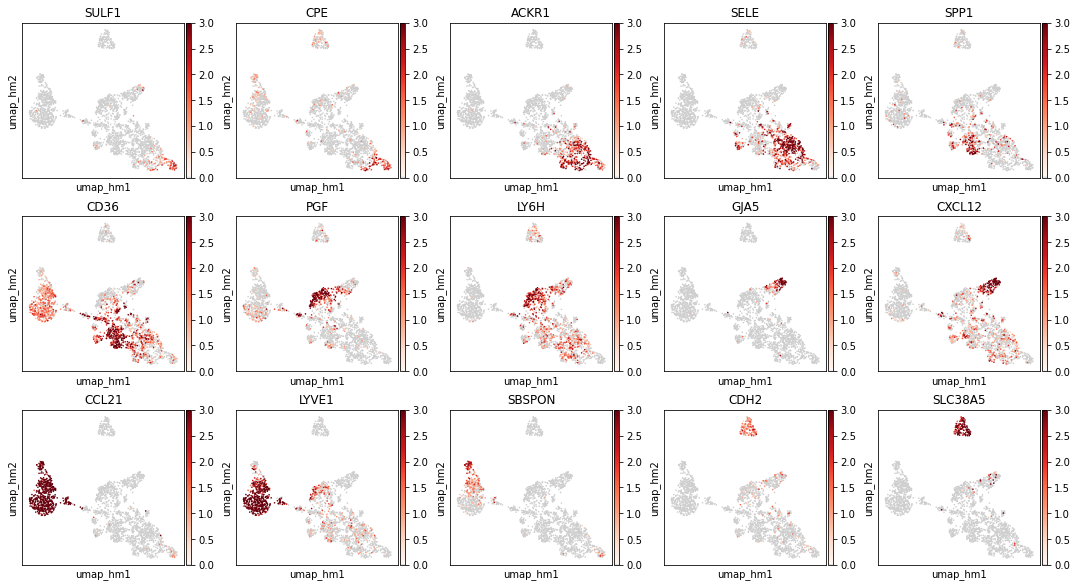

In [76]:
ss.lib.set_figsize((3, 3))
ss.lib.plot_scatter(
    et_pooled1, basis='umap_hm',
    color=['SULF1', 'CPE', 'ACKR1', 'SELE', 'SPP1', 'CD36', 'PGF', 'LY6H', 'GJA5', 'CXCL12', 'CCL21', 'LYVE1', 'SBSPON', 'CDH2', 'SLC38A5'],
    vmin=0, vmax=3, size=10, color_map=expr_cmap, wspace=0.2, ncols=5
)

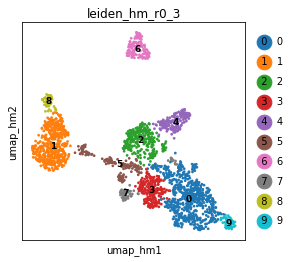

In [16]:
ss.lib.plot_embedding(et_pooled1, basis='umap_hm', size=30, groupby='leiden_hm_r0_3', figsize=(4, 4))

In [31]:
ss.lib.leiden(et_pooled1, resolution=0.1, use_graph='neighbors_hm', restrict_to=('leiden_hm_r0_3', ['5']), key_added='leiden_hm_split1')

['leiden_hm_split1']

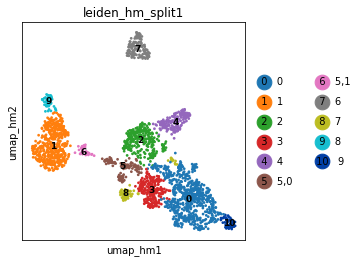

In [32]:
ss.lib.plot_embedding(et_pooled1, basis='umap_hm', size=30, groupby='leiden_hm_split1', figsize=(4, 4))

In [46]:
et_pooled1.obs['joint_annot'] = ss.lib.regroup(et_pooled1, groupby='leiden_hm_split1', regroups={
    'Early endothelial cell': '6',
    'Early LE': '8',
    'LE': ['1', '5,1'],
    'Arterial': '4',
    'Tip cell (arterial)': '2',
    'Capillary (venular tip)': ['3', '5,0', '7'],
    'Capillary/postcapillary venule': '0',
    'Postcapillary venule': '9',
})

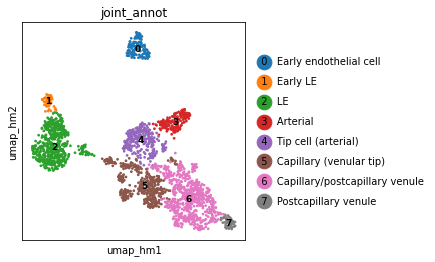

In [47]:
ss.lib.plot_embedding(et_pooled1, basis='umap_hm', size=30, groupby='joint_annot', figsize=(4, 4))

In [48]:
mkst = sk.calc_marker_stats(et_pooled1, groupby="joint_annot")

In [72]:
mks = sk.filter_marker_stats(mkst[2], max_next_frac=0.4, single=True, how='and')

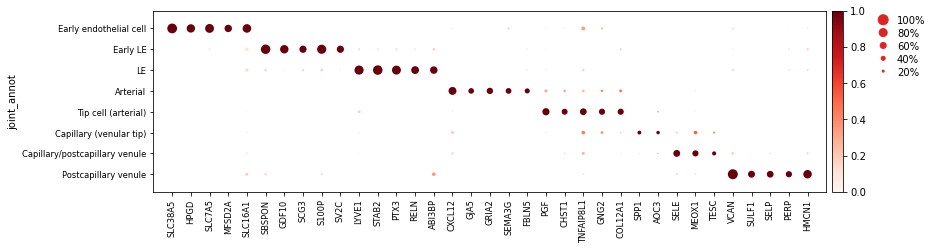

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[12.25, 0, 0.2, 0.5, 0.25])

In [74]:
sk.plot_markers(et_pooled1, groupby="joint_annot", mks=mks, n_genes=5, standard_scale='var')

# Processing

In [5]:
organoid_ad = sc.read("organoid.cellxgene.h5ad")
ads = sk.split_by_group(organoid_ad, groupby="nh3_broad_annot1")
ads["Endothelium"].obs = ads["Endothelium"].obs[
    [
        "sample_id",
        "batch",
        "day",
        "week",
        "strain",
        "n_counts",
        "n_genes",
        "percent_mito",
        "percent_ribo",
        "percent_hb",
        "percent_top50",
        "nh3_annot1",
    ]
]
oET_ad = ads["Endothelium"].copy()

In [6]:
fET_ad = sc.read(
    "../20200403_post_annot3_cleanup/fetal_skin.endothelium.doublet_removed_processed.20200403.h5ad"
)
fET_ad.X = fET_ad.raw.X
fET_ad.obs = fET_ad.obs[
    [
        "sanger_id",
        "chemistry_sorting",
        "donor",
        "gender",
        "pcw",
        "n_counts",
        "n_genes",
        "percent_mito",
        "percent_ribo",
        "percent_hb",
        "percent_top50",
        "rachel_annot3",
    ]
].rename(columns={"pcw": "week", "sanger_id": "batch"})

Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].


In [7]:
et_pooled = anndata.AnnData.concatenate(
    fET_ad, oET_ad, batch_key="dataset", batch_categories=["fetal_skin", "organoid"]
)

k_org = et_pooled.obs.dataset == "organoid"
et_pooled.obs["annot"] = "fsk_" + et_pooled.obs["rachel_annot3"].astype(str)
et_pooled.obs.loc[k_org, "annot"] = "org_" + et_pooled.obs.loc[k_org, "nh3_annot1"].astype(str)
et_pooled.obs["annot"] = et_pooled.obs["annot"].astype("category")

et_pooled.var['cc'] = et_pooled.var_names.isin(cc_genes)
et_pooled.var['mito'] = et_pooled.var_names.str.startswith('MT-')
et_pooled.var['ribo'] = et_pooled.var_names.str.startswith('RPS') | et_pooled.var_names.str.startswith('RPL')

In [8]:
et_pooled

AnnData object with n_obs × n_vars = 2303 × 15445
    obs: 'batch', 'chemistry_sorting', 'donor', 'gender', 'week', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'rachel_annot3', 'sample_id', 'day', 'strain', 'nh3_annot1', 'dataset', 'annot'
    var: 'gene_ids-fetal_skin', 'cc-fetal_skin', 'mito-fetal_skin', 'ribo-fetal_skin', 'hb-fetal_skin', 'n_cells-fetal_skin', 'highly_variable-fetal_skin', 'means-fetal_skin', 'dispersions-fetal_skin', 'dispersions_norm-fetal_skin', 'highly_variable_nbatches-fetal_skin', 'highly_variable_intersection-fetal_skin', 'hvg_full-fetal_skin', 'gene_ids-organoid', 'highly_variable-organoid', 'gene_symbols-organoid', 'cc', 'mito', 'ribo'
    obsm: 'X_umap_hm', 'X_umap_bk'

In [13]:
et_pooled1 = sk.simple_default_pipeline(
    et_pooled,
    do_clustering=True,
    clustering_resolution=[0.3, 0.5, 0.7, 0.9],
    post_norm_only=True,
    batch="batch",
    hvg_kw={"by_batch": ["batch", 1], "n_hvg": 3000},
    pca_kw={"remove_genes": ["mito", "ribo", "cc"]},
    nb_kw={"n_pcs": 20, "n_neighbors": 15},
)

... storing 'batch' as categorical
... storing 'chemistry_sorting' as categorical
... storing 'donor' as categorical
... storing 'gender' as categorical
... storing 'week' as categorical
... storing 'rachel_annot3' as categorical
... storing 'sample_id' as categorical
... storing 'day' as categorical
... storing 'strain' as categorical
... storing 'nh3_annot1' as categorical
2022-05-25 17:49:32,342 - harmonypy - INFO - Iteration 1 of 20
2022-05-25 17:49:33,107 - harmonypy - INFO - Iteration 2 of 20
2022-05-25 17:49:33,834 - harmonypy - INFO - Iteration 3 of 20
2022-05-25 17:49:34,593 - harmonypy - INFO - Iteration 4 of 20
2022-05-25 17:49:35,343 - harmonypy - INFO - Iteration 5 of 20
2022-05-25 17:49:35,823 - harmonypy - INFO - Iteration 6 of 20
2022-05-25 17:49:36,303 - harmonypy - INFO - Iteration 7 of 20
2022-05-25 17:49:36,993 - harmonypy - INFO - Iteration 8 of 20
2022-05-25 17:49:37,413 - harmonypy - INFO - Iteration 9 of 20
2022-05-25 17:49:37,695 - harmonypy - INFO - Iteration 

In [14]:
et_pooled1

AnnData object with n_obs × n_vars = 2303 × 3818
    obs: 'batch', 'chemistry_sorting', 'donor', 'gender', 'week', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'rachel_annot3', 'sample_id', 'day', 'strain', 'nh3_annot1', 'dataset', 'annot', 'leiden_hm_r0_3', 'leiden_hm_r0_5', 'leiden_hm_r0_7', 'leiden_hm_r0_9'
    var: 'gene_ids-fetal_skin', 'cc-fetal_skin', 'mito-fetal_skin', 'ribo-fetal_skin', 'hb-fetal_skin', 'n_cells-fetal_skin', 'highly_variable-fetal_skin', 'means-fetal_skin', 'dispersions-fetal_skin', 'dispersions_norm-fetal_skin', 'highly_variable_nbatches-fetal_skin', 'highly_variable_intersection-fetal_skin', 'hvg_full-fetal_skin', 'gene_ids-organoid', 'highly_variable-organoid', 'gene_symbols-organoid', 'cc', 'mito', 'ribo', 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std', 'hvg_full'
    uns: 'hvg', 'pca', 'neighbors_hm', 'u

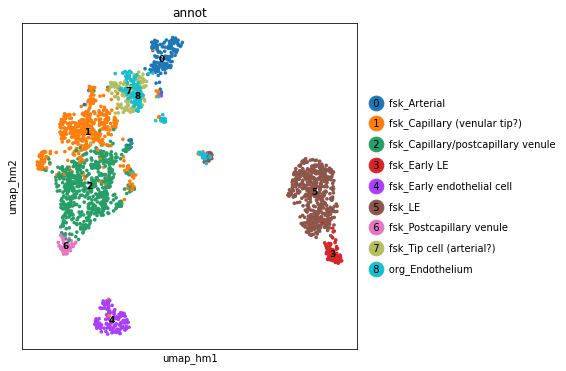

In [15]:
ss.lib.plot_embedding(et_pooled1, basis="umap_hm", groupby="annot", figsize=(6, 6));

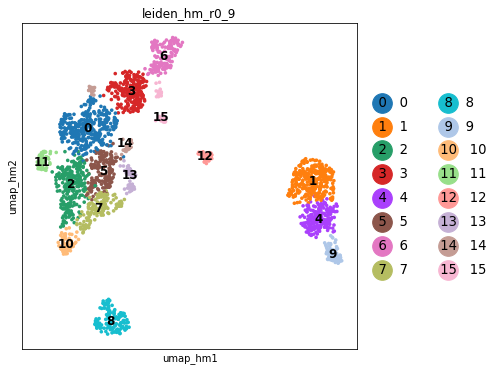

In [16]:
ss.lib.plot_embedding(et_pooled1, basis="umap_hm", groupby="leiden_hm_r0_9", figsize=(6, 6), legend_fontsize=12);

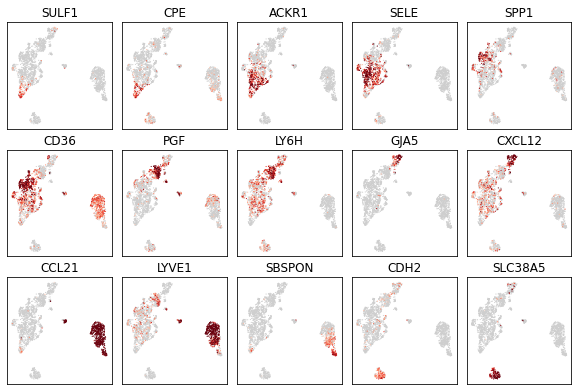

In [17]:
sk.plot_genes(
    et_pooled1, basis='umap_hm',
    genes=['SULF1', 'CPE', 'ACKR1', 'SELE', 'SPP1', 'CD36', 'PGF', 'LY6H', 'GJA5', 'CXCL12', 'CCL21', 'LYVE1', 'SBSPON', 'CDH2', 'SLC38A5'],
    vmin=0, vmax=3, size=5, ncols=5
)

In [ ]:
ss.lib.set_figsize((4, 4))
ss.lib.highlight(
    et_pooled,
    basis="umap_hm",
    groupby="annot",
    groups={
        "fetal skin": [
            "fsk_Early endothelial cell",
            "fsk_Arterial",
            "fsk_Tip cell (arterial?)",
            "fsk_Capillary/postcapillary venule",
            "fsk_Postcapillary venule",
            "fsk_Capillary (venular tip?)",
            "fsk_Early LE",
            "fsk_LE",
        ],
        "organoid": ["org_Endothelium"],
    },
    wspace=0.7,
)

In [ ]:
ss.lib.set_figsize((5, 5))
ss.lib.plot_scatter(
    et_pooled, basis="umap_hm", color=["week"], ncols=6, wspace=0.5, size=20, palette="viridis"
)

In [ ]:
ss.lib.set_figsize((4, 4))
ss.lib.plot_scatter(
    et_pooled, basis="umap_hm", color=["dataset", "batch"], ncols=6, wspace=0.5, palette="tab20"
)

In [ ]:
ss.lib.set_figsize((3, 3))
ss.lib.plot_scatter(
    et_pooled,
    basis="umap_hm",
    color_map=expr_cmap,
    ncols=5,
    size=25,
    color=["PLVAP", "CCL21", "CDK1"],
)

In [17]:
# et_pooled.write('pooled_endothelium.processed.h5ad', compression='lzf')

... storing 'gene_symbols-organoid' as categorical


In [2]:
tmp_ad = sc.read("../20200626_make_figure_for_Muzz/pooled_endothelium.processed.cellxgene.h5ad")

In [3]:
tmp_ad

AnnData object with n_obs × n_vars = 2048 × 15445
    obs: 'batch', 'chemistry_sorting', 'dataset', 'day', 'donor', 'gender', 'n_counts', 'n_genes', 'nh3_annot1', 'percent_hb', 'percent_mito', 'percent_ribo', 'percent_top50', 'sample_id', 'strain', 'week', 'annot', 'joint_annot'
    var: 'gene_ids'
    obsm: 'X_umap_hm'

Trying to set attribute `.uns` of view, copying.


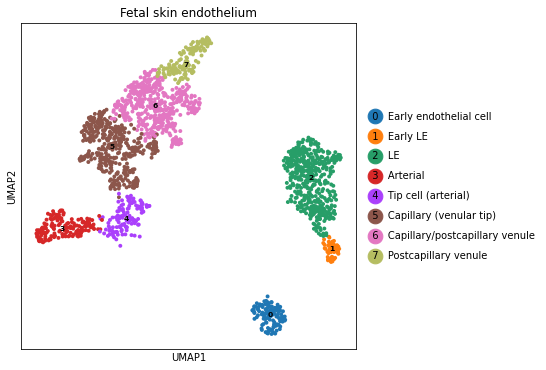

In [11]:
sk.clear_colors(tmp_ad)
ax = sk.plot_embedding(tmp_ad[tmp_ad.obs.dataset=="fetal_skin"], basis="umap_hm", groupby="joint_annot", figsize=(6, 6));
ax.set_xlabel("UMAP1");
ax.set_ylabel("UMAP2");
ax.set_title("Fetal skin endothelium");
plt.gcf().savefig("pooled_endothelium.fsk.umap.pdf")

<AxesSubplot:title={'center':'rachel_annot3'}, xlabel='umap_hm1', ylabel='umap_hm2'>

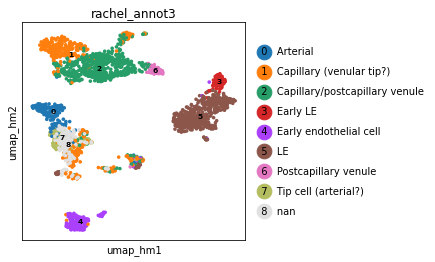

In [23]:
sk.plot_embedding(tmp_ad, basis="umap_hm", groupby="rachel_annot3")